## Predicting Malignant and Benign Breast Turmors with SVM, Random Forest, and Logistic Regression...

This notebook looks into using variuous Python-based machine learning and data science 
libraries in attempt to build a machine learning model capable of predicting whether or 
not someone has breast cancer based on the medical attributes.

we're going to take the following approach:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination
In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have Breast Cancer?

## 2. Data
The original Data came from the [WISCONSIN DIAGNOSTIC LABORATORIES](https://www.wisconsindiagnostic.com/) UCI Machine Learning Repository [UCI ML-repo](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

There is also a version of it available on Kaggle. [kaggle UCI data](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

Description of the data: [Data Discription](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data)

## 3. Evaluation 

> If we can achieve at least 98% sensitivity in detecting malignant cases and a ROC-AUC of 97% or higher during the proof of concept, we’ll pursue the project.

## 4. Features

**Attribute Information:**

1. id: ID number
2. diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
3. radius_mean: mean of distances from center to points on the perimeter
4. texture_mean: standard deviation of gray-scale values
5. perimeter_mean: mean size of the core tumor
6. area_mean
7. smoothness_mean: mean of local variation in radius lengths
8. compactness_mean: mean of perimeter^2 / area - 1.0
9. concavity_mean: mean of severity of concave portions of the contour
10. concave points_mean: mean for number of concave portions of the contour
11. symmetry_mean
12. fractal_dimension_mean: mean for "coastline approximation" - 1
13. radius_se: standard error for the mean of distances from center to points on the perimeter
14. texture_se: standard error for standard deviation of gray-scale values
15. perimeter_se
16. area_se
17. smoothness_se: standard error for local variation in radius lengths
18. compactness_se: standard error for perimeter^2 / area - 1.0
19. concavity_se: standard error for severity of concave portions of the contour
20. concave points_se: standard error for number of concave portions of the contour
21. symmetry_se
22. fractal_dimension_se: standard error for "coastline approximation" - 1
23. radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
24. texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
25. perimeter_worst
26. area_worst
27. smoothness_worst: "worst" or largest mean value for local variation in radius lengths
28. compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
29. concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
30. concave points_worst: "worst" or largest mean value for number of concave portions of the contour
31. symmetry_worst
32. fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

## Label(Target Variable):

Our target variable is the column named diagnosis which contained two elements:
* M-> Malignint (cancerous)
* B-> Benign (non-cancerous)

## Objectives:

1. Data Preprocessing
2. Exploratory Data Analysis(EDA)
3. Feature Selection
4. Data Scalling
5. Various Machine Learning Estimators
6. Hyperparameter Tuning
7. Model Comparison

## Preparing the tools
We're going to use `Pandas`, `Matplotlib`, and `Numpy` for Data Analysis and Manipulation.

In [2]:
# regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

# preprocessing
from sklearn.preprocessing import StandardScaler

## Load Data:

In [3]:
df = pd.read_csv('../data/csv/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# data shape
df.shape

(569, 33)

## Data Exploration (exploratory data analysis EDA)

The goal here is to find out more about the data and become a subject matter expert on the `dataset` we're working with.

1. What question are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add change or remove features to get more out of our data?

In [5]:
# last 5 rows of the dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


###  1. Data Preprocessing

In [6]:
# how many each class there are in the label
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

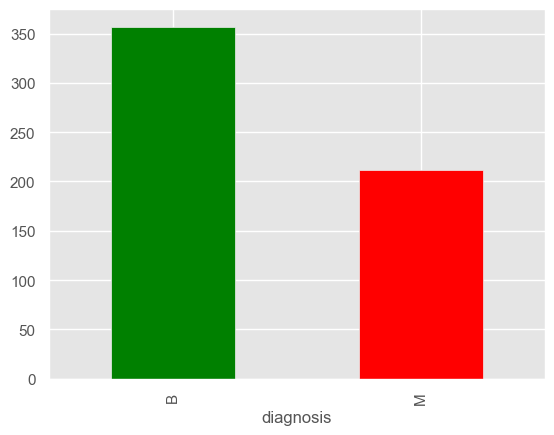

In [7]:
# visualize the label elements
sns.set()
plt.style.use('ggplot')
df['diagnosis'].value_counts().plot(kind='bar', color=['green', 'red']);

In [8]:
# data infor(metadata)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# data statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
# Drop the unwanted colunm('id') from the data
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# checking missing values(NaN) again
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

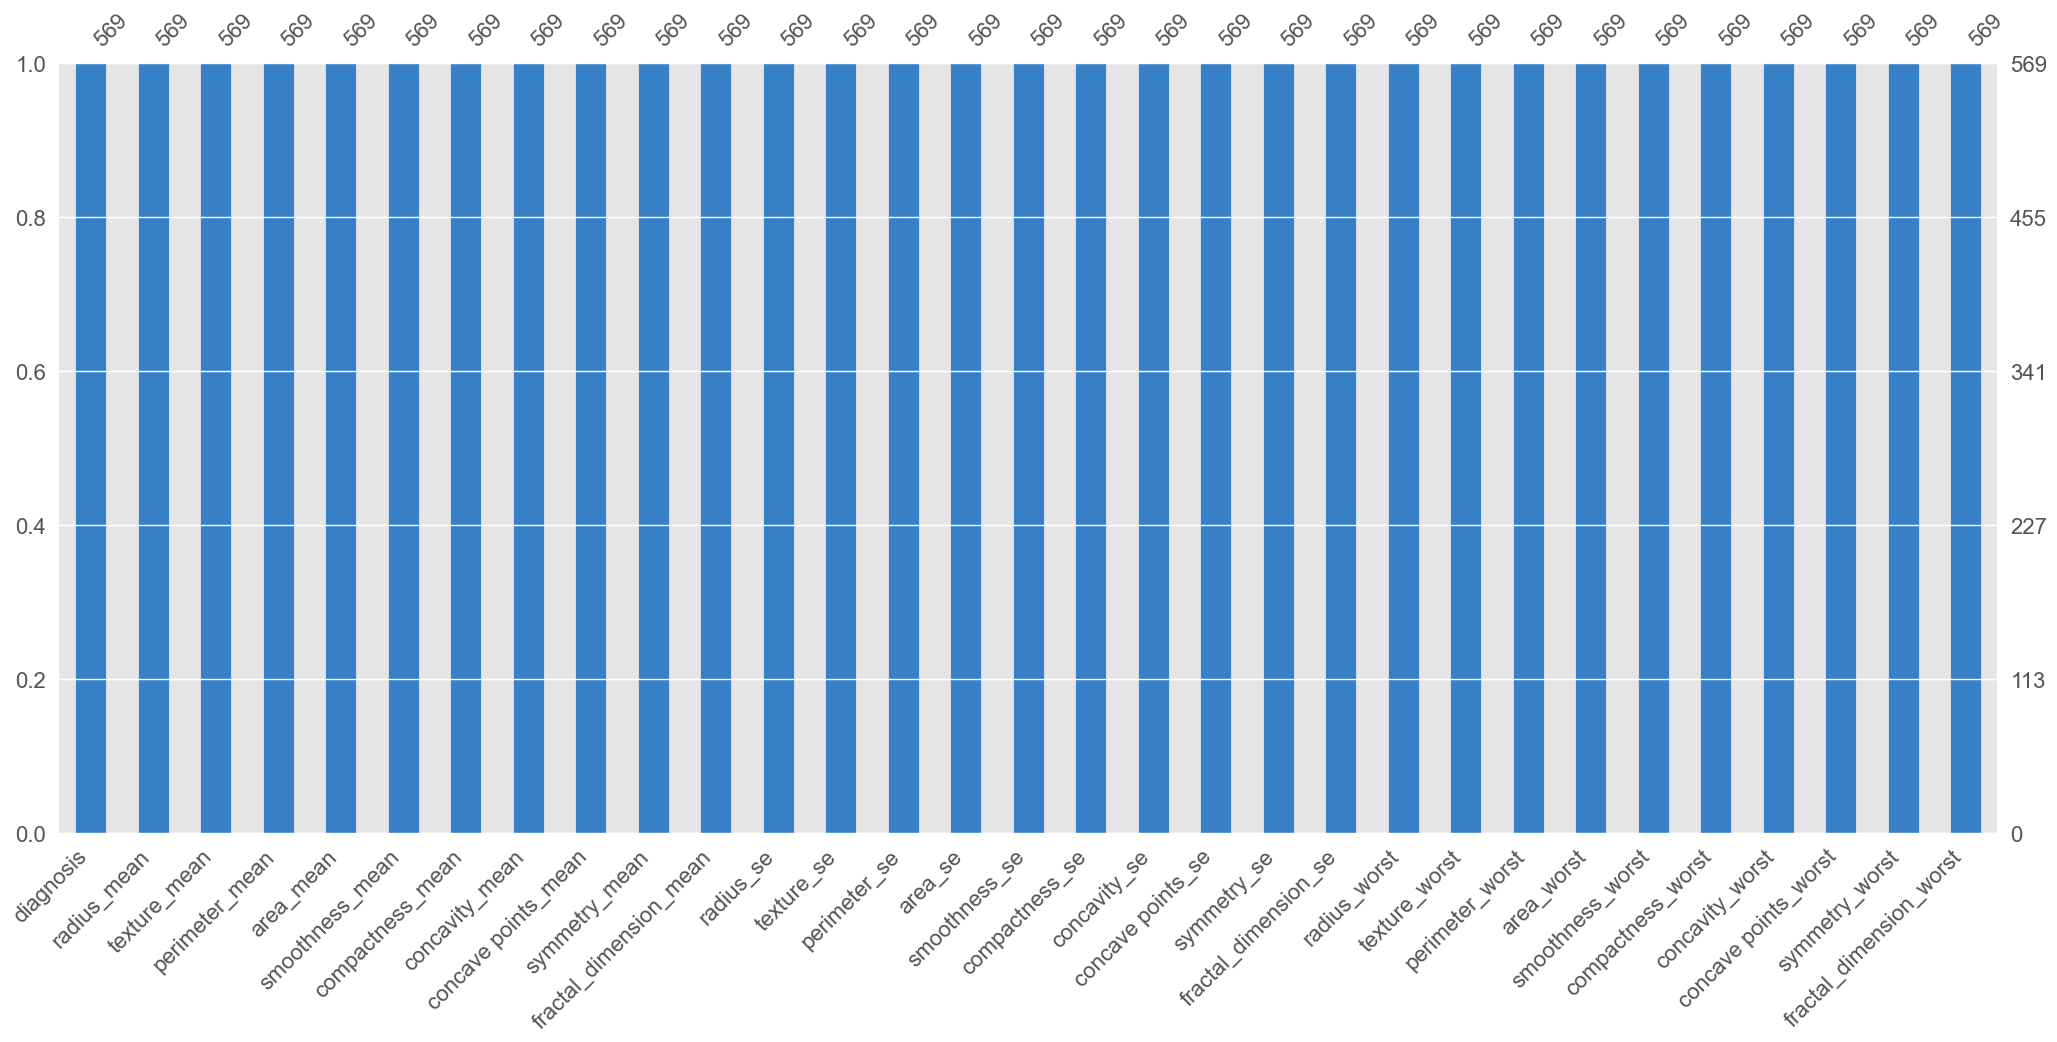

In [12]:
# view the above cell result with msno
msno.bar(df, color='#3780C8');

In [13]:
# convert label (diagnosis colunm)to numeric(int) form
df['diagnosis'] = df['diagnosis'].apply(lambda val:0 if val=='B' else 1)

# view the label unique elements again
df.diagnosis.unique()

array([1, 0], dtype=int64)

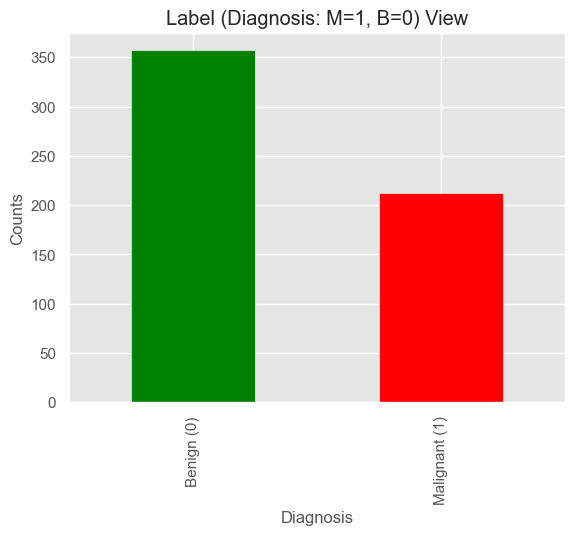

In [14]:
# if df.diagnosis is 0/1
counts = df.diagnosis.value_counts().sort_index()   # index 0 then 1
counts.plot(kind='bar', color=['green', 'red'])     # 0 -> green, 1 -> red
plt.xticks([0,1], ['Benign (0)', 'Malignant (1)'])
plt.xlabel('Diagnosis')
plt.ylabel('Counts')
plt.title('Label (Diagnosis: M=1, B=0) View')
plt.show()


### 2. EDA

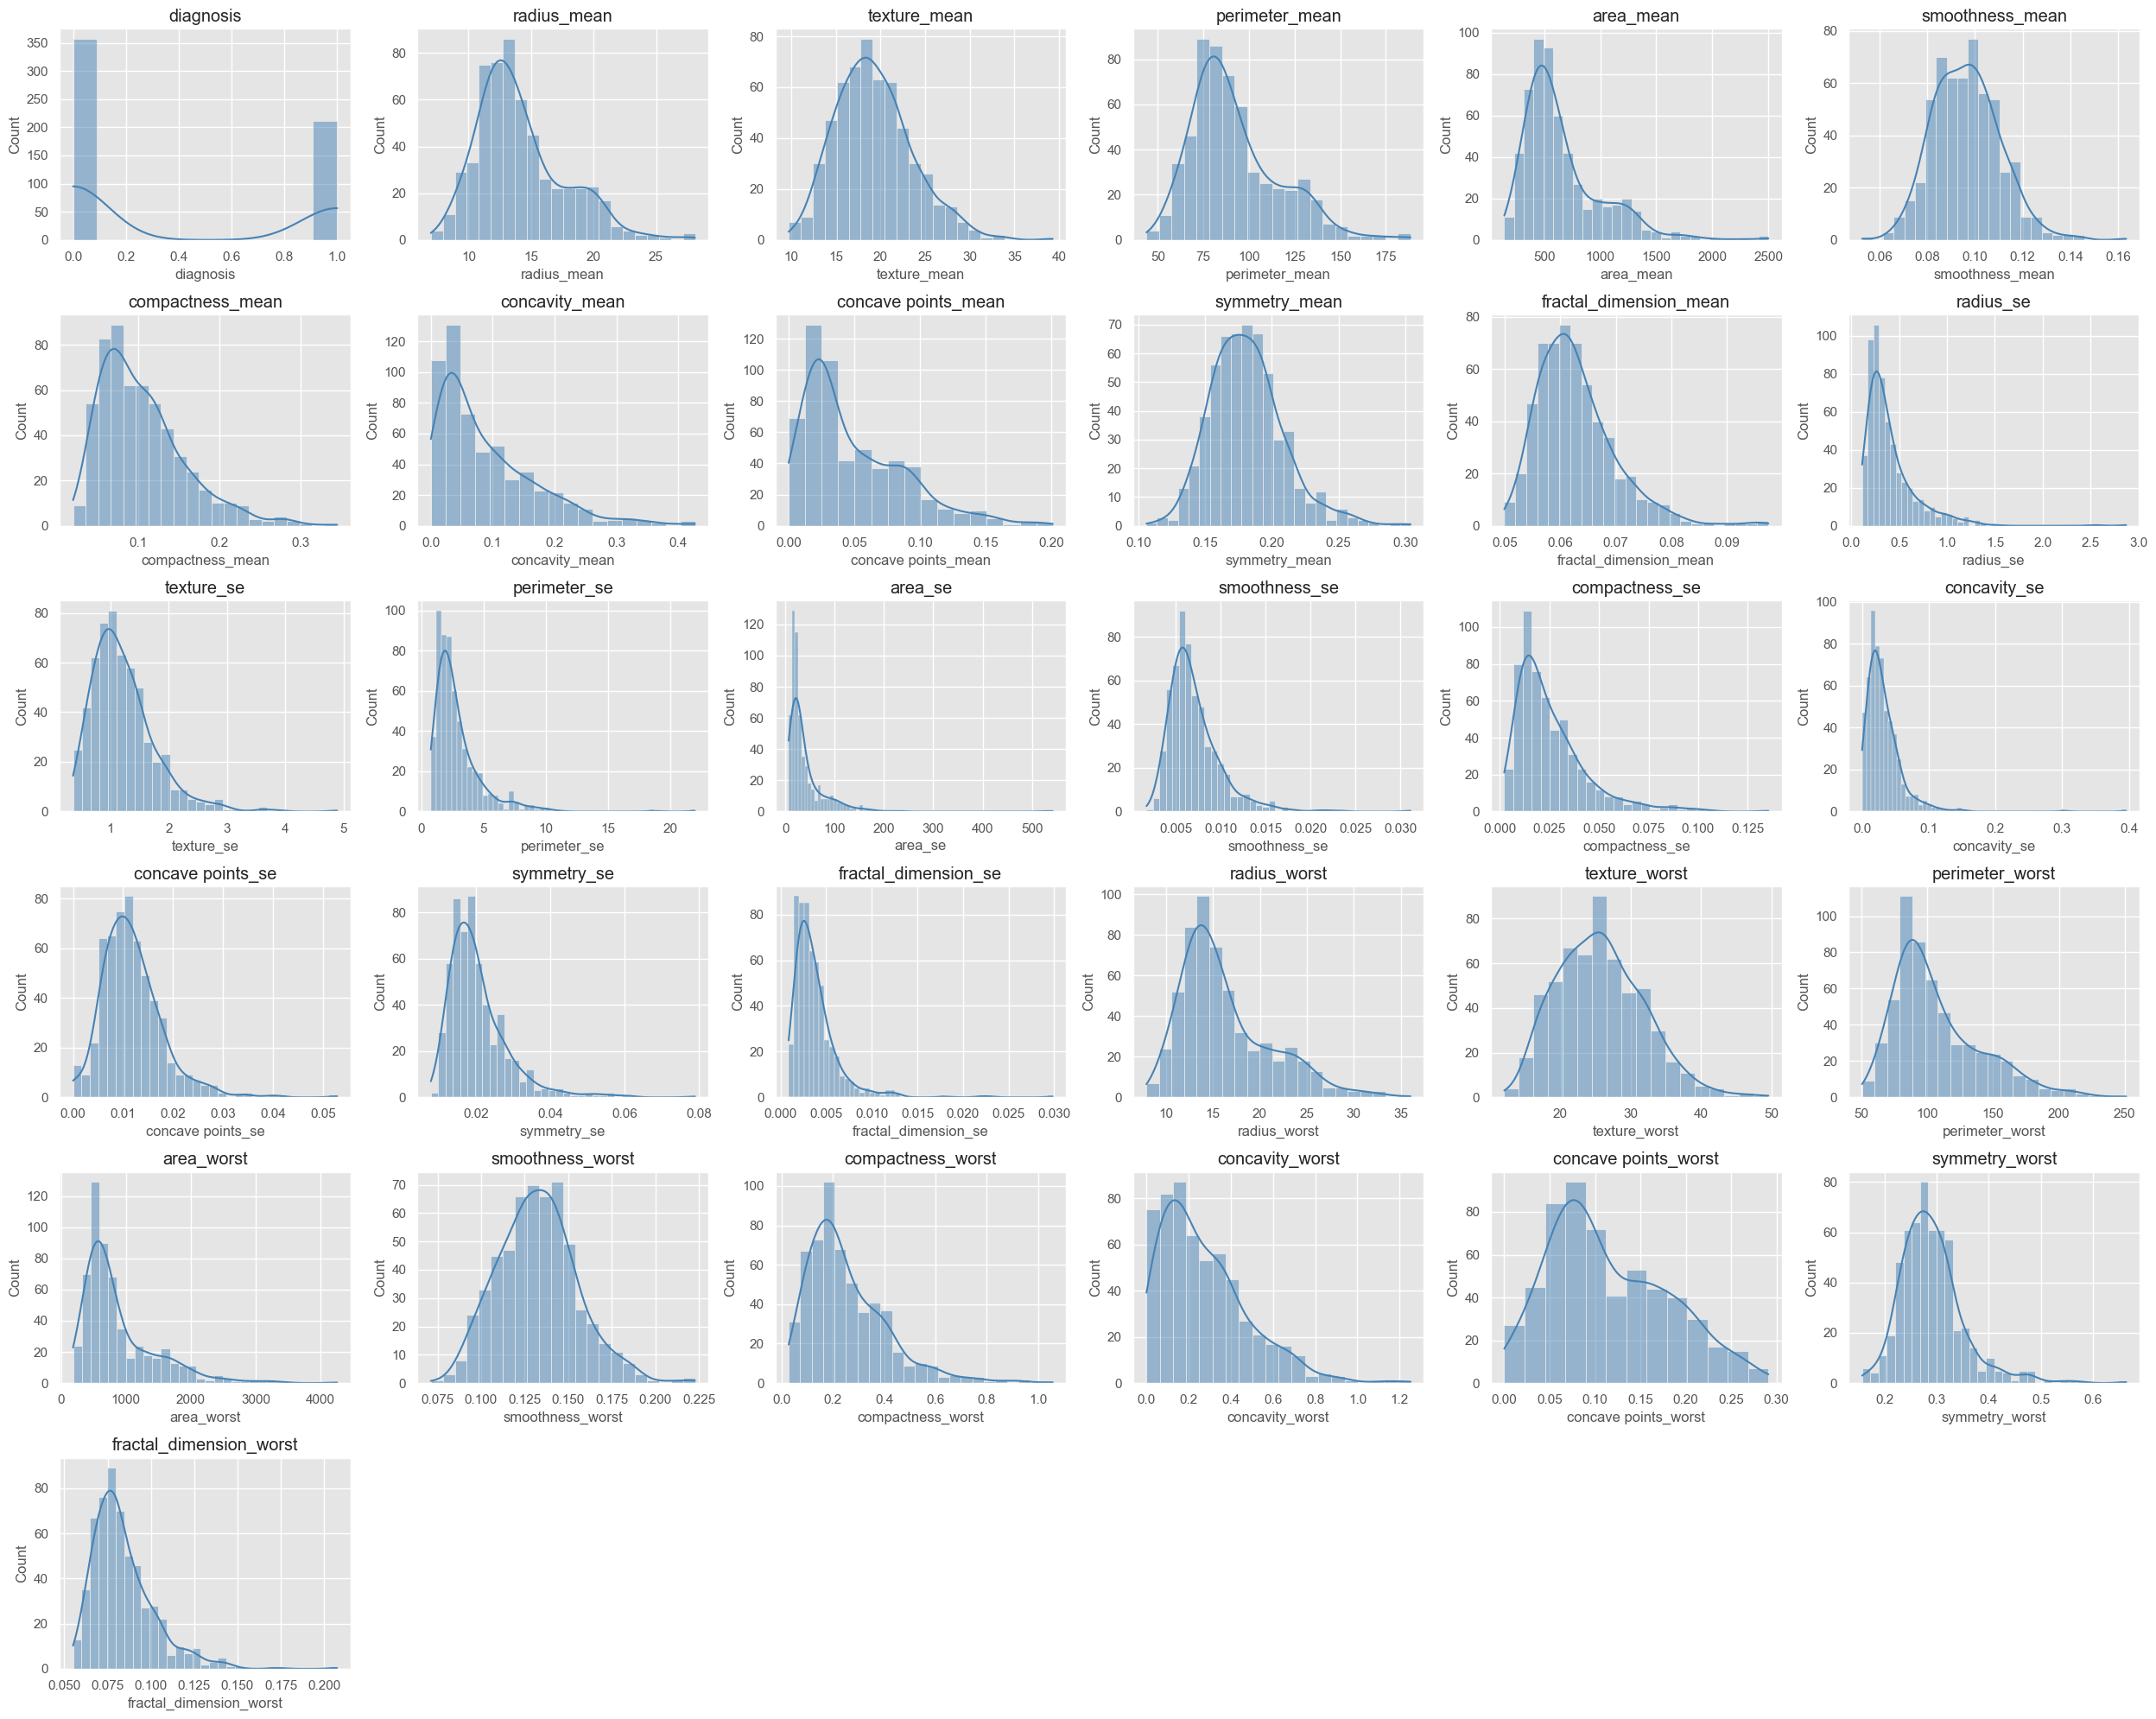

In [15]:
# density graph for all numerical columns
# 6 column in each row
# this block will to helps decide preprocessing steps
plt.figure(figsize=(25, 20))

numerical_cols = df.select_dtypes(include=['float', 'int']).columns
densitynumber = 1

for column in numerical_cols:
    ax = plt.subplot(6, 6, densitynumber)
    sns.histplot(df[column], kde=True, color="steelblue")
    plt.xlabel(column)
    plt.title(column)
    densitynumber += 1

plt.tight_layout()
plt.show()


In [16]:
# correlation
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


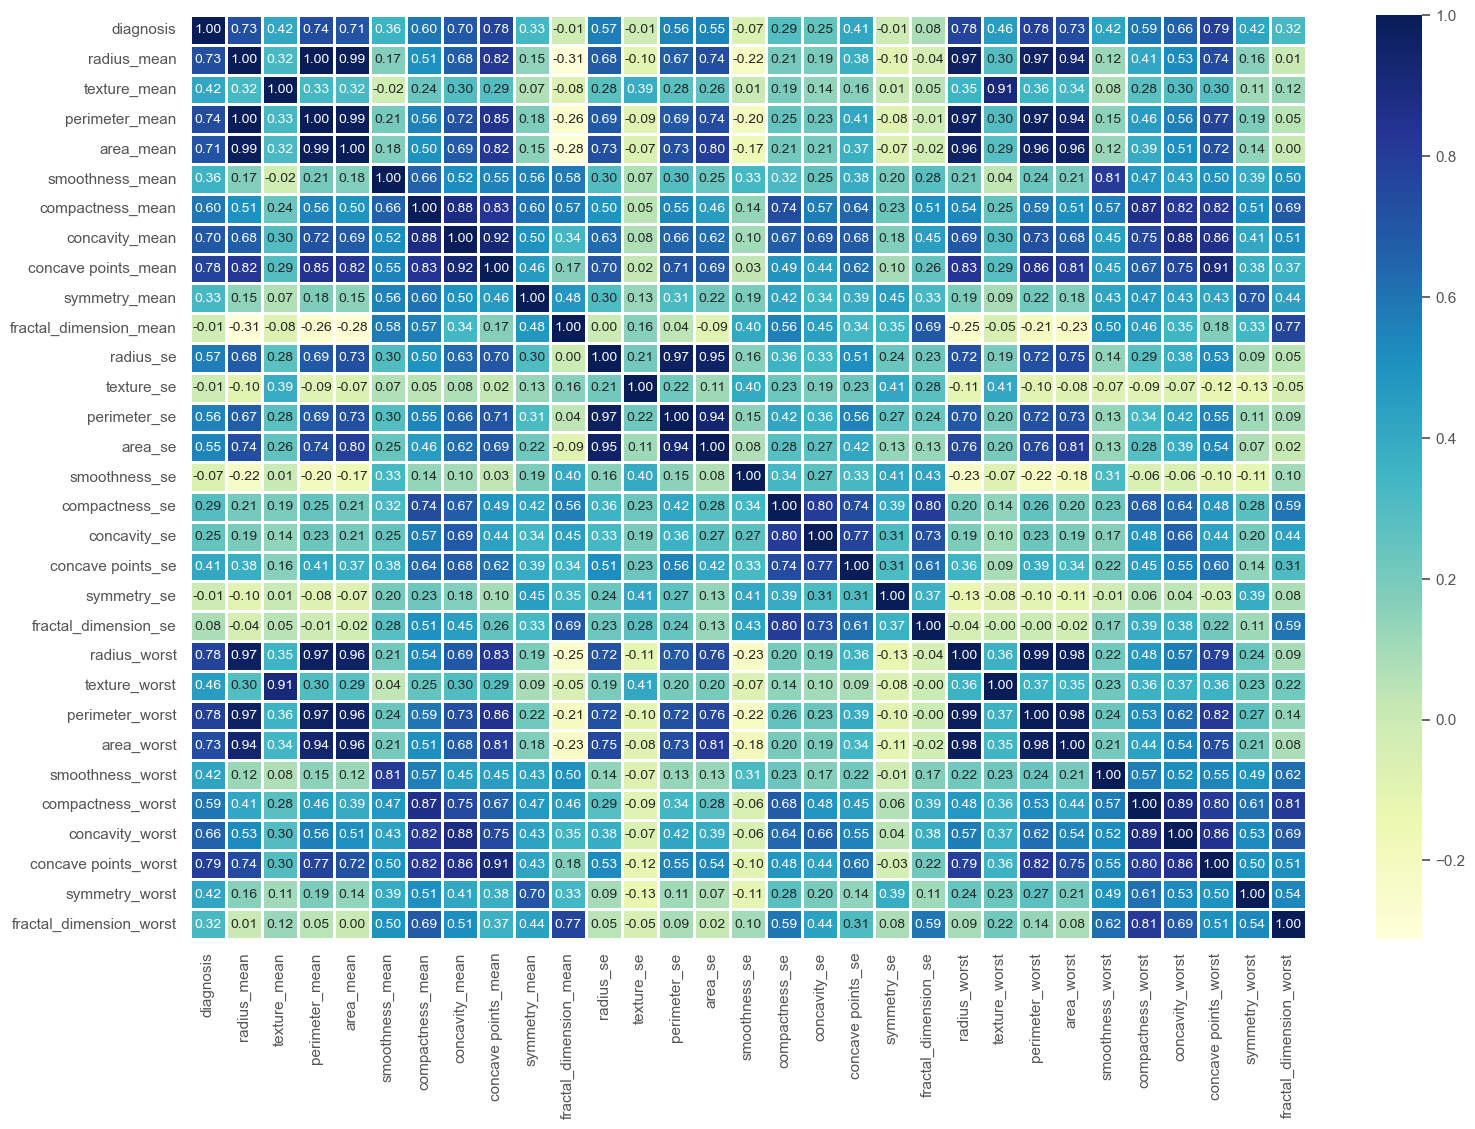

In [17]:
# view the heat map
heatmap_cor = df.corr()
fig, ax, = plt.subplots(figsize=(18,12))

ax = sns.heatmap(heatmap_cor,
                annot=True,
                linewidths=1,
                fmt='.2f',
                cmap='YlGnBu')

### 3. Feature Selection

In [18]:
# feature selection
corr_matrix = df.corr().abs() # calculates how strongly features are related to each other
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # the mask keeps only one half, preventing duplicate comparisons
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)] # identify features to drop

df = df.drop(to_drop, axis=1) # drop the redundant features

print(df.shape[1])

23


The features now reduced to 23

In [20]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 4. Data Scalling

In [21]:
# view the data head again
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# split data into X (fearture) and y (label)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [23]:
X.shape # features

(569, 22)

In [24]:
y # label

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [25]:
# split data into train and test set
np.random.seed(11) # set random set to keep dataset consistent
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2) # training set 80% and test set 20%

In [26]:
X_train # expecting 455 rows and 22 columns

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
2,21.25,0.10960,0.15990,0.127900,0.2069,0.05999,0.7869,94.03,0.006150,0.040060,...,0.02250,0.004571,25.53,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
74,16.52,0.09172,0.06829,0.022720,0.1720,0.05914,1.0250,19.68,0.004854,0.018190,...,0.01386,0.002304,23.21,611.1,0.1176,0.18430,0.17030,0.08660,0.2618,0.07609
456,29.29,0.09357,0.08574,0.020170,0.1799,0.06166,2.4260,23.13,0.009861,0.024180,...,0.02475,0.002128,38.81,527.8,0.1406,0.20310,0.29230,0.06835,0.2884,0.07220
564,22.39,0.11100,0.11590,0.138900,0.1726,0.05623,1.2560,158.70,0.010300,0.028910,...,0.01114,0.004239,26.40,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115
411,16.83,0.10770,0.07804,0.024800,0.1714,0.06340,1.3870,13.54,0.005158,0.009355,...,0.01718,0.002198,26.44,471.4,0.1369,0.14820,0.10670,0.07431,0.2998,0.07881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,19.86,0.10540,0.06779,0.007583,0.1940,0.06028,1.9660,19.62,0.012890,0.011040,...,0.04243,0.001963,25.78,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
269,20.39,0.10820,0.12890,0.028670,0.1668,0.06862,1.4890,20.74,0.008902,0.047850,...,0.02728,0.007610,25.21,410.4,0.1335,0.25500,0.25340,0.08600,0.2605,0.08701
337,21.43,0.09116,0.14020,0.060900,0.1953,0.06083,1.5300,88.25,0.007548,0.038970,...,0.02168,0.004445,34.37,1873.0,0.1498,0.48270,0.46340,0.20480,0.3679,0.09870
91,22.76,0.09200,0.10360,0.074830,0.1717,0.06097,0.8413,29.44,0.009882,0.024440,...,0.02471,0.002142,25.84,830.9,0.1257,0.19970,0.28460,0.14760,0.2556,0.06828


In [27]:
X_test # expecting 114 rows and 22 columns

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
198,22.49,0.08523,0.14280,0.067720,0.1767,0.05529,1.0730,54.22,0.005524,0.036980,...,0.01415,0.003397,32.06,1688.0,0.13220,0.56010,0.38650,0.17080,0.3193,0.09221
162,18.15,0.11200,0.16660,0.128600,0.2027,0.06082,1.0480,97.07,0.004057,0.022770,...,0.01686,0.003318,26.39,2232.0,0.14380,0.38460,0.68100,0.22470,0.3643,0.09223
70,21.31,0.09009,0.10290,0.079510,0.1582,0.05461,0.7975,96.05,0.004444,0.016520,...,0.01386,0.001698,26.58,1866.0,0.11930,0.23360,0.26870,0.17890,0.2551,0.06589
393,22.28,0.11670,0.20870,0.156200,0.2162,0.06606,0.9209,80.99,0.005215,0.037260,...,0.02045,0.004028,28.74,2081.0,0.15020,0.57170,0.70530,0.24220,0.3828,0.10070
56,18.57,0.10530,0.12670,0.089940,0.1917,0.05961,1.1930,102.50,0.006458,0.023060,...,0.01852,0.002608,28.14,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,15.49,0.08293,0.07698,0.023810,0.1930,0.06621,1.2000,30.18,0.010930,0.028990,...,0.02837,0.004174,17.70,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431
221,13.90,0.10510,0.11920,0.044510,0.1962,0.06303,0.4981,21.03,0.005851,0.023140,...,0.01842,0.002918,17.13,686.6,0.13760,0.26980,0.25770,0.09090,0.3065,0.08177
219,32.47,0.08420,0.11300,0.066370,0.1428,0.05313,1.3210,109.90,0.005539,0.026440,...,0.01332,0.002256,45.41,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568
308,12.71,0.07376,0.03614,0.004419,0.1365,0.05335,0.6864,20.39,0.003338,0.003746,...,0.01480,0.001566,16.94,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192


In [28]:
# preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
len(y_train) # expecting 455 elements

455

### 5. Various Machine Learning Estimators

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train the model (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 7 different machine learning models and then take the one that achieve our `go/no-go decision point` statements:
1. Logistic Regression
2. KNeighborsClassifier
3. Support Vector Machine (SVM)
4. Decision Tree Classifier
5. Random Forest Classifier
6. Gradient Boosting Classifier
7. XGBoost Classifier

In [30]:
# models dictinary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DT': DecisionTreeClassifier(),
    'Random forest': RandomForestClassifier(),
    'GBC': GradientBoostingClassifier(),
    'XGBoost Classifier': XGBClassifier()
}

# function to fit and score models
def fit_and_score(models:dict, X_train, X_test, y_train, y_test)->dict:
    '''
    Fit and Evaluate the machine learning model.
    Return the set of models with Evaluation score value.
    X_train: Training Features with no labels,
    y_train: Training Labels without Features,
    X_test: Evaluation/test Featutres with no labels,
    y_test: Evaluation/test labels without Features.
    '''

    # setup seed
    np.random.seed(11)

    # store the model score
    model_score = {}
    for name, model in models.items():

        # fit each model with the training data
        model.fit(X_train, y_train)

        # evaluate each model with test data and store the score
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [31]:
# fit and evaluates our model with the function
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.9736842105263158,
 'KNN': 0.9649122807017544,
 'SVM': 0.9736842105263158,
 'DT': 0.9736842105263158,
 'Random forest': 0.9912280701754386,
 'GBC': 1.0,
 'XGBoost Classifier': 1.0}

#### Base Model Scores

In [32]:
# score result
models_score_results = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy'])
models_score_results

,Accuracy
Logistic Regression,0.973684
KNN,0.964912
SVM,0.973684
DT,0.973684
Random forest,0.991228
GBC,1.000000
XGBoost Classifier,1.000000


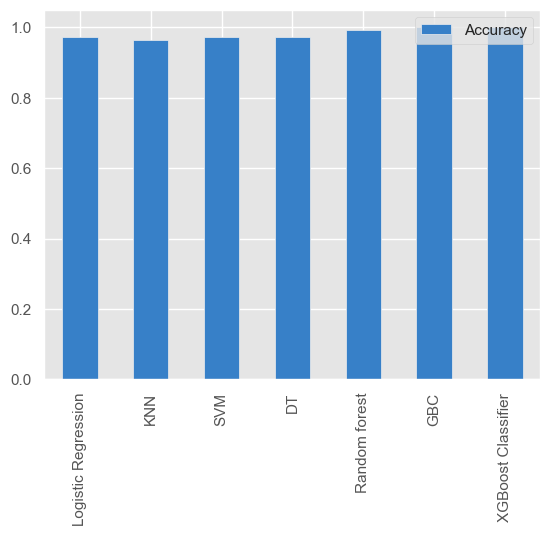

In [33]:
models_score_results.plot(kind='bar', color='#3780C8');

### 6. Hyperparameters tuning.

In [34]:
# Logistic reg param grid
lg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# random forest reg param grid
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# KNN param grid
knn_param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# svm param grid
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# DT param grid
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GBC param grid
gbc_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

# xgboost param grid
xgb_param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [35]:
# ---------LOGISTICS REGRESSION MODEL HYPERPARAMETERS TURNING---------------
# RandomizedSearchCV hyperparameter turning for log_reg
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=lg_param_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# fit rs_log_reg model
rs_log_reg.fit(X_train, y_train)

# evaluate rs_log_reg model
rs_log_score = rs_log_reg.score(X_test, y_test)

# GridSearchCV hyperparameter for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=lg_param_grid,
                         cv=5,
                         verbose=True)

# fit the gs log reg model
gs_log_reg.fit(X_train, y_train)

# evaluate the model
gs_log_score = gs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [36]:
rs_log_reg, gs_log_reg

(RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                    param_distributions={'C': [0.01, 0.1, 1, 10],
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear', 'saga']},
                    verbose=True),
 GridSearchCV(cv=5, estimator=LogisticRegression(),
              param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},
              verbose=True))

In [37]:
# ------RANDOM FOREST CALSSIFIER MODEL HYPERPARAMETER TURNING------
# RandomizedSearchCV hyperparameter turning for rf
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_param_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# fit rs_log_reg model
rs_rf.fit(X_train, y_train)

# evaluate rs_log_reg model
rs_rf_score = rs_rf.score(X_test, y_test)

# GridSearchCV hyperparameter for rf
gs_rf = GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_param_grid,
                         cv=5,
                         verbose=True)

# fit the gs log reg model
gs_rf.fit(X_train, y_train)

# evaluate the model
gs_rf_score = gs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [38]:
rs_rf, gs_rf,

(RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                    param_distributions={'max_depth': [None, 10, 20],
                                         'max_features': ['sqrt', 'log2'],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [100, 300, 500]},
                    verbose=True),
 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
              param_grid={'max_depth': [None, 10, 20],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100, 300, 500]},
              verbose=True))

In [39]:
# ------KNN MODEL HYPERPARAMETER TURNING------
# RandomizedSearchCV hyperparameter turning for KNN
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                               param_distributions=knn_param_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# fit rs_log_reg model
rs_knn.fit(X_train, y_train)

# evaluate rs_log_reg model
rs_knn_score = rs_knn.score(X_test, y_test)

# GridSearchCV hyperparameter for KNN
gs_knn = GridSearchCV(KNeighborsClassifier(),
                         param_grid=knn_param_grid,
                         cv=5,
                         verbose=True)

# fit the gs log reg model
gs_knn.fit(X_train, y_train)

# evaluate the model
gs_knn_score = gs_knn.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [40]:
rs_knn, gs_knn

(RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                    param_distributions={'metric': ['euclidean', 'manhattan'],
                                         'n_neighbors': range(1, 31),
                                         'weights': ['uniform', 'distance']},
                    verbose=True),
 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
              param_grid={'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': range(1, 31),
                          'weights': ['uniform', 'distance']},
              verbose=True))

In [41]:
# ------SVM MODEL HYPERPARAMETER TURNING------
# RandomizedSearchCV hyperparameter turning for SVM
rs_svc = RandomizedSearchCV(SVC(),
                               param_distributions=svc_param_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# fit rs_log_reg model
rs_svc.fit(X_train, y_train)

# evaluate rs_log_reg model
rs_svc_score = rs_svc.score(X_test, y_test)

# GridSearchCV hyperparameter for SVM
gs_svc = GridSearchCV(SVC(),
                         param_grid=svc_param_grid,
                         cv=5,
                         verbose=True)

# fit the gs log reg model
gs_svc.fit(X_train, y_train)

# evaluate the model
gs_svc_score = gs_svc.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [42]:
rs_svc, gs_svc

(RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                    param_distributions={'C': [0.1, 1, 10, 100],
                                         'gamma': ['scale', 'auto', 0.01, 0.001],
                                         'kernel': ['rbf', 'linear']},
                    verbose=True),
 GridSearchCV(cv=5, estimator=SVC(),
              param_grid={'C': [0.1, 1, 10, 100],
                          'gamma': ['scale', 'auto', 0.01, 0.001],
                          'kernel': ['rbf', 'linear']},
              verbose=True))

In [43]:
# ------DT MODEL HYPERPARAMETER TURNING------
# RandomizedSearchCV hyperparameter turning for DT
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                               param_distributions=dt_param_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# fit rs_log_reg model
rs_dt.fit(X_train, y_train)

# evaluate rs_log_reg model
rs_dt_score = rs_dt.score(X_test, y_test)

# GridSearchCV hyperparameter for DT
gs_dt = GridSearchCV(DecisionTreeClassifier(),
                         param_grid=dt_param_grid,
                         cv=5,
                         verbose=True)

# fit the gs log reg model
gs_dt.fit(X_train, y_train)

# evaluate the model
gs_dt_score = gs_dt.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [44]:
rs_dt, gs_dt

(RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                    param_distributions={'criterion': ['gini', 'entropy'],
                                         'max_depth': [None, 5, 10, 20],
                                         'min_samples_split': [2, 5, 10]},
                    verbose=True),
 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 5, 10, 20],
                          'min_samples_split': [2, 5, 10]},
              verbose=True))

In [45]:
# ------GBC MODEL HYPERPARAMETER TURNING------
# RandomizedSearchCV hyperparameter turning for GBC
rs_gbc = RandomizedSearchCV(GradientBoostingClassifier(),
                               param_distributions=gbc_param_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# fit rs_log_reg model
rs_gbc.fit(X_train, y_train)

# evaluate rs_log_reg model
rs_gbc_score = rs_gbc.score(X_test, y_test)

# GridSearchCV hyperparameter for DT
gs_gbc = GridSearchCV(GradientBoostingClassifier(),
                         param_grid=gbc_param_grid,
                         cv=5,
                         verbose=True)

# fit the gs log reg model
gs_gbc.fit(X_train, y_train)

# evaluate the model
gs_gbc_score = gs_gbc.score(X_test, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [46]:
rs_gbc, gs_gbc

(RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                    param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                         'max_depth': [2, 3, 4],
                                         'n_estimators': [100, 200]},
                    verbose=True),
 GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
              param_grid={'learning_rate': [0.01, 0.1, 0.2],
                          'max_depth': [2, 3, 4], 'n_estimators': [100, 200]},
              verbose=True))

In [47]:
# ------XGBoost MODEL HYPERPARAMETER TURNING------
# RandomizedSearchCV hyperparameter turning for XGBoost
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                               param_distributions=xgb_param_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# fit rs_log_reg model
rs_xgb.fit(X_train, y_train)

# evaluate rs_log_reg model
rs_xgb_score = rs_xgb.score(X_test, y_test)

# GridSearchCV hyperparameter for XGBoost
gs_xgb = GridSearchCV(XGBClassifier(),
                         param_grid=xgb_param_grid,
                         cv=5,
                         verbose=True)

# fit the gs log reg model
gs_xgb.fit(X_train, y_train)

# evaluate the model
gs_xgb_score = gs_xgb.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [48]:
rs_xgb, gs_xgb

(RandomizedSearchCV(cv=5,
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constrain...
                                            max_delta_step=None, max_depth=None,
                                            

In [49]:
# hyperparameter tuning score values
rs_and_gs_results = {
    'Logistic Reg RSCV Model Score': [rs_log_reg.best_params_, rs_log_score],
    'Logistic Reg GSCV Model Score': [gs_log_reg.best_params_, gs_log_score],
    
    'Random Forest RSCV Model Score': [rs_rf.best_params_, rs_rf_score],
    'Random Forest GSCV Model Score': [gs_rf.best_params_, gs_rf_score],
    
    'KNN RSCV Model Score': [rs_knn.best_params_, rs_knn_score],
    'KNN GSCV Model Score': [gs_knn.best_params_, gs_knn_score],
    
    'SVM RSCV Model Score': [rs_svc.best_params_, rs_svc_score],
    'SVM GSCV Model Score': [gs_svc.best_params_, gs_svc_score],
    
    'DT RSCV Model Score': [rs_dt.best_params_, rs_dt_score],
    'DT GSCV Model Score': [gs_dt.best_params_, gs_dt_score],
    
    'GBC RSCV Model Score': [rs_gbc.best_params_, rs_gbc_score],
    'GBC GSCV Model Score': [gs_gbc.best_params_, gs_gbc_score],
    
    'XGB RSCV Model Score': [rs_xgb.best_params_, rs_xgb_score],
    'XGB GSCV Model Score': [gs_xgb.best_params_, gs_xgb_score],
}

# turned result DataFrame
turned_model = pd.DataFrame.from_dict(
    rs_and_gs_results,
    orient='index',
    columns=['Best Parameters', 'Tuned Score']
)

In [50]:
# randomized search cv logistic regression model
rs_log_reg

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   verbose=True)

In [51]:
# gridsearchcv logistic regression model
gs_log_reg

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=True)

In [52]:
# randomized search cv randomforest model
rs_rf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   verbose=True)

In [53]:
# gridsearchcv randomforest model
gs_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=True)

In [54]:
# rscv knn model
rs_knn

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [55]:
# gscv knn model
gs_knn

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [56]:
# rscv svm model
rs_svc

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto', 0.01, 0.001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=True)

In [57]:
# gscv svm model
gs_svc

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=True)

In [58]:
# rscv dt model
rs_dt

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10]},
                   verbose=True)

In [59]:
# gscv dt
gs_dt

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             verbose=True)

In [60]:
# rscv gbc model
rs_gbc

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [2, 3, 4],
                                        'n_estimators': [100, 200]},
                   verbose=True)

In [61]:
# gscv gbc model
gs_gbc

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4], 'n_estimators': [100, 200]},
             verbose=True)

In [62]:
# rscv xgb model
rs_xgb

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   verbose=True)

In [63]:
# gscv xgb model
gs_xgb

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             verbose=True)

In [64]:
turned_model

,Best Parameters,Tuned Score
Logistic Reg RSCV Model Score,"{'solver': 'saga', 'penalty': 'l2', 'C': 1}",0.973684
Logistic Reg GSCV Model Score,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.973684
Random Forest RSCV Model Score,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.982456
Random Forest GSCV Model Score,"{'max_depth': None, 'max_features': 'log2', 'm...",0.991228
KNN RSCV Model Score,"{'weights': 'distance', 'n_neighbors': 19, 'me...",0.956140
KNN GSCV Model Score,"{'metric': 'manhattan', 'n_neighbors': 13, 'we...",0.964912
SVM RSCV Model Score,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}",0.982456
SVM GSCV Model Score,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.982456
DT RSCV Model Score,"{'min_samples_split': 2, 'max_depth': 5, 'crit...",0.964912
DT GSCV Model Score,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.938596


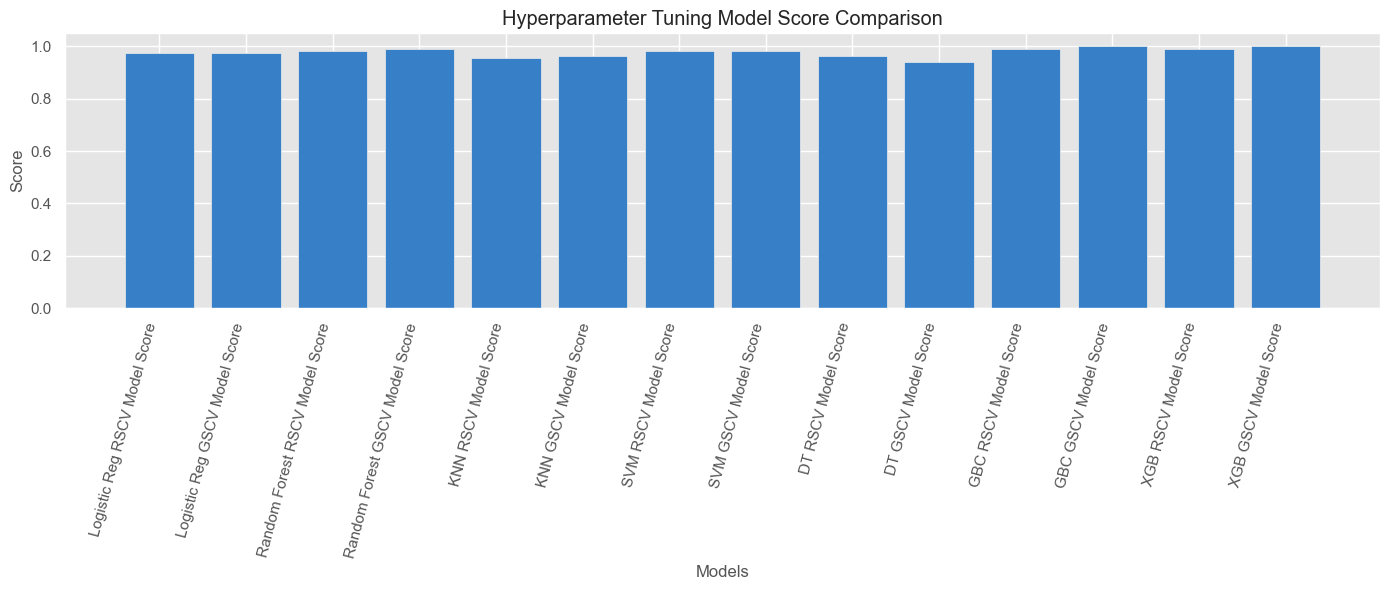

In [65]:
plt.figure(figsize=(14, 6))

# Bar plot: model scores
plt.bar(turned_model.index, turned_model["Tuned Score"], color='#3780C8')

# Rotate labels for readability
plt.xticks(rotation=75, ha='right')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Hyperparameter Tuning Model Score Comparison")

plt.tight_layout()
plt.show()

### 7. Model Comparison:

#### Evaluating tuned ML-Classfiers, beyond accuracy.

* ROC curve and AUC Score
* Confusion matrix
* Classification report

In [66]:
# selected models
best_models = {
    'Logistic Regression': gs_log_reg,
    'Random Forest': gs_rf,
    'KNN': gs_knn,
    'SVM': gs_svc,
    'DT': rs_dt,
    'GBC': rs_xgb,
    'XGBoost Classifier': gs_xgb
}

# funtion to evealuate the selected models and prints the performance info
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve,
    precision_recall_curve, confusion_matrix, classification_report
)

def evaluate_models_full(models, X_test, y_test):
    """
    Evaluate multiple ML models and generate:
    - Accuracy
    - ROC-AUC
    - Confusion Matrix
    - Classification Report
    - ROC Curves
    - Precision-Recall Curves
    - Comparison Bar Chart
    
    models: dict {"Model Name": trained_model}
    """

    results = []
    roc_info = {}
    pr_info = {}

    for name, model in models.items():
        print("="*60)
        print(f"Evaluating: {name}")
        print("="*60)

        # probability scores
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            try:
                y_proba = model.decision_function(X_test)
            except:
                y_proba = None

        # predictions
        y_pred = model.predict(X_test)

        # metrics
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        # save results
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "ROC_AUC": roc_auc
        })

        # store ROC info
        if y_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            precision, recall, _ = precision_recall_curve(y_test, y_proba)

            roc_info[name] = (fpr, tpr)
            pr_info[name] = (precision, recall)

        # ---- Confusion Matrix ----
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
        plt.title(f"Confusion Matrix — {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # ---- Classification Report ----
        print(f"\nClassification Report — {name}")
        print(classification_report(y_test, y_pred))
        print("\n\n")

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # ================================
    # PLOT ROC Curves for all models
    # ================================
    plt.figure(figsize=(8, 6))
    for name, (fpr, tpr) in roc_info.items():
        plt.plot(fpr, tpr, label=name)

    plt.plot([0, 1], [0, 1], "k--")  # baseline
    plt.title("ROC Curve Comparison")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

    # ================================
    # Precision-Recall Curves
    # ================================
    plt.figure(figsize=(8, 6))
    for name, (prec, rec) in pr_info.items():
        plt.plot(rec, prec, label=name)

    plt.title("Precision-Recall Curve Comparison")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid()
    plt.show()

    # ================================
    # Bar Plot of Accuracy & ROC-AUC
    # ================================
    plt.figure(figsize=(8, 5))
    results_df.set_index("Model")[["Accuracy", "ROC_AUC"]].plot(kind="bar")
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.ylim(0, 1.05)
    plt.grid(axis="y")
    plt.show()

    return results_df

Evaluating: Logistic Regression


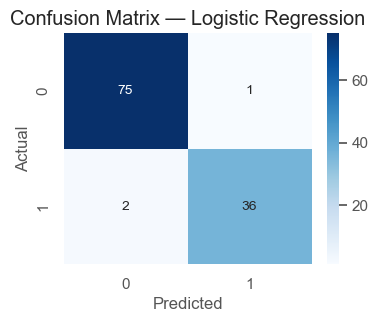


Classification Report — Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.95      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




Evaluating: Random Forest


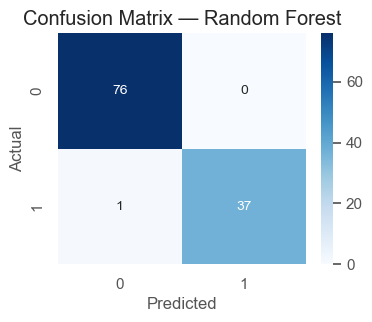


Classification Report — Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.97      0.99        38

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114




Evaluating: KNN


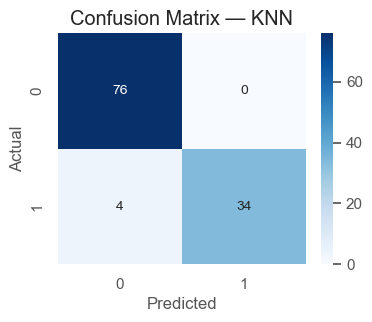


Classification Report — KNN
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       1.00      0.89      0.94        38

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114




Evaluating: SVM


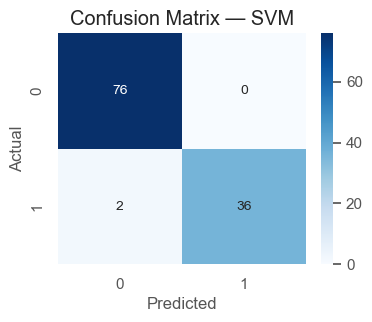


Classification Report — SVM
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.95      0.97        38

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114




Evaluating: DT


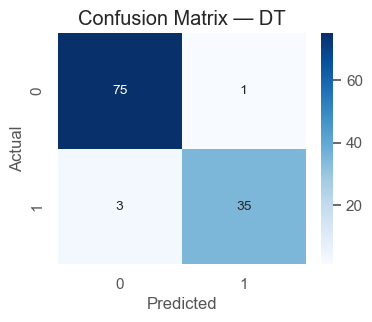


Classification Report — DT
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.97      0.92      0.95        38

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114




Evaluating: GBC


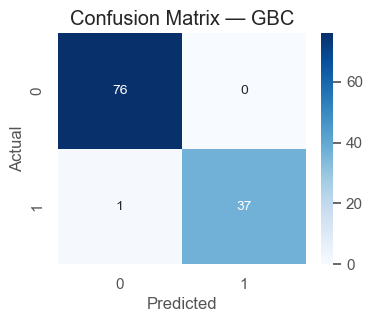


Classification Report — GBC
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.97      0.99        38

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114




Evaluating: XGBoost Classifier


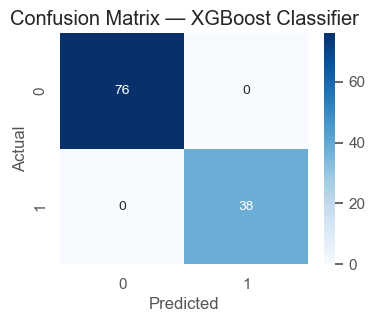


Classification Report — XGBoost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        38

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114






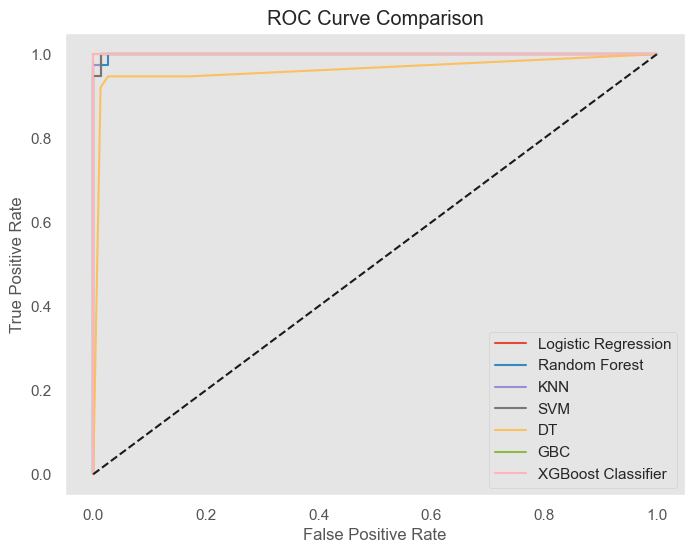

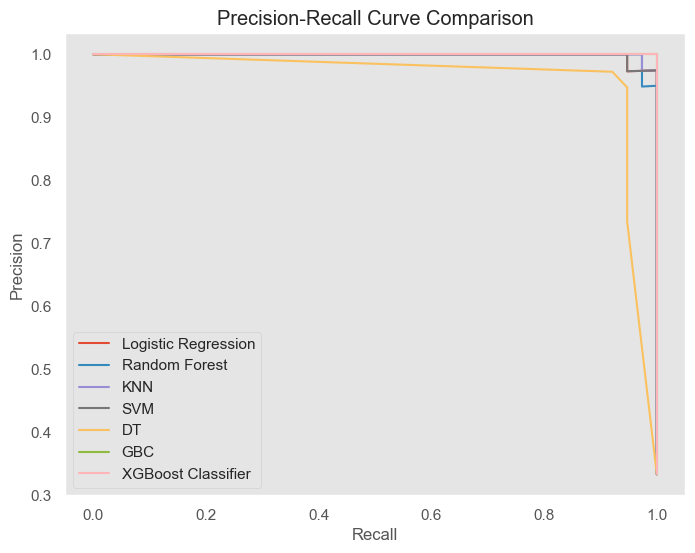

<Figure size 800x500 with 0 Axes>

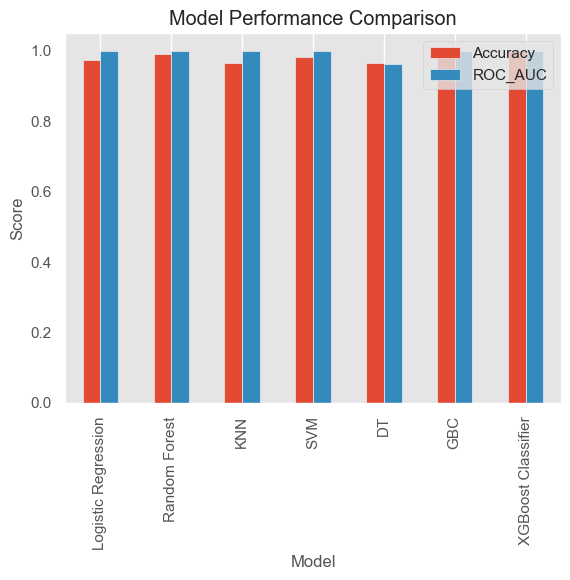

,Model,Accuracy,ROC_AUC
0,Logistic Regression,0.973684,0.999307
1,Random Forest,0.991228,0.999307
2,KNN,0.964912,0.999654
3,SVM,0.982456,0.999307
4,DT,0.964912,0.962604
5,GBC,0.991228,1.000000
6,XGBoost Classifier,1.000000,1.000000


In [67]:
models_ev_results = evaluate_models_full(best_models, X_test, y_test)
models_ev_results

In [69]:
import pickle

# chosed and save the best model (svc)
clf = gs_svc
pickle.dump(clf, open('../models/classifier.pkl', 'wb'))

In [68]:
# from sklearn.metrics import (
#     accuracy_score, roc_auc_score, roc_curve,
#     confusion_matrix, classification_report,
#     precision_recall_curve, f1_score
# )

# def evaluate_models_full(models, X_test, y_test, export_csv=True):
#     results = []
#     roc_info = {}
#     pr_info = {}
#     confusion_matrices = {}
#     f1_scores = {}

#     for name, model in models.items():
#         print("="*70)
#         print(f"Evaluating Model: {name}")
#         print("="*70)

#         # ----- Safe probability extraction -----
#         y_proba = None
#         if hasattr(model, "predict_proba"):
#             try:
#                 y_proba = model.predict_proba(X_test)[:, 1]
#             except:
#                 pass

#         if y_proba is None:
#             try:
#                 y_proba = model.decision_function(X_test)
#             except:
#                 print(f"⚠ {name} cannot produce probability scores — ROC/AUC will be skipped.")

#         # ----- Predictions -----
#         y_pred = model.predict(X_test)

#         # ----- Metrics -----
#         accuracy = accuracy_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)
#         roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

#         results.append({
#             "Model": name,
#             "Accuracy": accuracy,
#             "ROC_AUC": roc_auc,
#             "F1_Score": f1
#         })

#         f1_scores[name] = f1

#         # ----- Confusion matrix -----
#         cm = confusion_matrix(y_test, y_pred)
#         confusion_matrices[name] = cm

#         # ----- Classification Report -----
#         print(classification_report(y_test, y_pred))

#         # ----- ROC info -----
#         if y_proba is not None:
#             fpr, tpr, _ = roc_curve(y_test, y_proba)
#             precision, recall, _ = precision_recall_curve(y_test, y_proba)

#             roc_info[name] = (fpr, tpr)
#             pr_info[name] = (precision, recall)

#     # Convert results to DataFrame
#     results_df = pd.DataFrame(results)

#     # ------------------------------------------------------
#     # SAVE RESULTS
#     # ------------------------------------------------------
#     if export_csv:
#         results_df.to_csv("model_results.csv", index=False)
#         print("\n📁 Results exported to 'model_results.csv'\n")

#     # ------------------------------------------------------
#     # ROC CURVES
#     # ------------------------------------------------------
#     if len(roc_info) > 0:
#         plt.figure(figsize=(8, 6))
#         for name, (fpr, tpr) in roc_info.items():
#             plt.plot(fpr, tpr, label=name)

#         plt.plot([0, 1], [0, 1], "k--")
#         plt.title("ROC Curve Comparison")
#         plt.xlabel("False Positive Rate")
#         plt.ylabel("True Positive Rate")
#         plt.grid()
#         plt.legend()
#         plt.show()

#     # ------------------------------------------------------
#     # F1-SCORE BAR PLOT
#     # ------------------------------------------------------
#     f1_df = pd.DataFrame(list(f1_scores.items()), columns=["Model", "F1_Score"])
#     plt.figure(figsize=(8, 6))
#     ax = sns.barplot(data=f1_df, x="Model", y="F1_Score")
#     plt.title("F1 Score Comparison")
#     plt.ylim(0, 1.05)
#     plt.xticks(rotation=45)

#     # add score labels
#     for p in ax.patches:
#         ax.annotate(f"{p.get_height():.3f}",
#                     (p.get_x() + p.get_width() / 2, p.get_height()),
#                     ha="center", va="bottom")

#     plt.show()

#     # ------------------------------------------------------
#     # CONFUSION MATRIX GRID
#     # ------------------------------------------------------
#     num_models = len(confusion_matrices)
#     cols = 2
#     rows = int(np.ceil(num_models / cols))

#     plt.figure(figsize=(12, rows * 4))

#     for idx, (name, cm) in enumerate(confusion_matrices.items(), 1):
#         plt.subplot(rows, cols, idx)
#         sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
#         plt.title(f"{name}")
#         plt.xlabel("Predicted")
#         plt.ylabel("Actual")

#     plt.tight_layout()
#     plt.show()

#     # ------------------------------------------------------
#     # SELECT BEST MODEL
#     # ------------------------------------------------------
#     ranked = results_df.sort_values(
#         by=["ROC_AUC", "Accuracy", "F1_Score"],
#         ascending=False
#     ).reset_index(drop=True)

#     best_model_name = ranked.iloc[0]["Model"]

#     print("\n🏆 BEST MODEL SELECTED:", best_model_name)
#     print(ranked)

#     return ranked
